# 画AUPR曲线和ROC曲线

In [1]:
import seaborn
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import matplotlib
plt.rc('font', family='Times New Roman')
matplotlib.rcParams.update({'font.size': 14}) # 改变所有字体大小，改变其他性质类似
plt.rc('font', weight='bold')
from sklearn import metrics

## 1、导入保存的五次五折的概率值score和真实标签

In [2]:
#-------第一次五折
K_score = pd.read_csv('records/seed222/Siridataset/score.csv', index_col=0)
K_label = pd.read_csv('records/seed222/Siridataset/true_label.csv', index_col=0)
y_true = np.array(K_label)
y_score = np.array(K_score)

#-------第二次五折
K_score2 = pd.read_csv('records/seed444/Siridataset/score.csv', index_col=0)
K_label2 = pd.read_csv('records/seed444/Siridataset/true_label.csv', index_col=0)
y_true2 = np.array(K_label2)
y_score2 = np.array(K_score2)

#-------第三次五折
K_score3 = pd.read_csv('records/seed666/Siridataset/score.csv', index_col=0)
K_label3 = pd.read_csv('records/seed666/Siridataset/true_label.csv', index_col=0)
y_true3 = np.array(K_label3)
y_score3 = np.array(K_score3)

#-------第四次五折
K_score4 = pd.read_csv('records/seed777/Siridataset/score.csv', index_col=0)
K_label4 = pd.read_csv('records/seed777/Siridataset/true_label.csv', index_col=0)
y_true4 = np.array(K_label4)
y_score4 = np.array(K_score4)

#-------第五次五折
K_score5 = pd.read_csv('records/seed999/Siridataset/score.csv', index_col=0)
K_label5 = pd.read_csv('records/seed999/Siridataset/true_label.csv', index_col=0)
y_true5 = np.array(K_label5)
y_score5 = np.array(K_score5)

In [3]:
# 把五次五折的数据连接起来
label = np.concatenate((y_true, y_true2, y_true3, y_true4, y_true5), axis=0)
score = np.concatenate((y_score, y_score2, y_score3, y_score4, y_score5), axis=0)

## 2、绘制AUPR曲线

In [4]:
def plot_pr(y, score):
    plt.rc('font', family='Times New Roman')
    font = 'Times New Roman'
    precision_dtc, recall_dtc, thresholds_dtc = precision_recall_curve(y, score)
    # aupr= metrics.auc(recall_dtc, precision_dtc)  # 计算AUPR值
    plt.plot(recall_dtc,precision_dtc,  color='darkorange',label='AUPR=0.904±0.009')
    # precision_dtc2, recall_dtc2, thresholds_dtc2 = precision_recall_curve(y2, score2)
    # aupr2 = metrics.auc(recall_dtc2, precision_dtc2)  # 计算AUPR值
    # plt.plot(precision_dtc2, recall_dtc2, color='steelblue',label='without weights')
    # plt.title('Precision-Recall curve')
    # plt.plot([1, 0], [0, 1], 'r--')
    plt.xlim([0.0, 1.05])
    plt.ylim([0.5, 1.05])
    plt.ylabel('Precision',weight = 'bold')
    plt.xlabel('Recall',weight = 'bold')
    # plt.grid(linestyle='-.')
    # plt.grid(True)
    # plt.legend(loc='upper right')
    plt.legend(loc='upper left')
#     plt.savefig("Mdata_AUPR.png", dpi=300)
#     plt.savefig("Mdata_AUPR_600.png", dpi=600)
#     plt.savefig('Mdata_AUPR_svg_600.svg', format='svg', dpi=600)  # 输出
    plt.show()

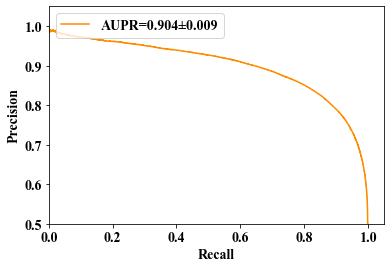

In [5]:
plot_pr(label,score)

## 3、绘制ROC曲线

In [6]:
def plot_roc(y, score):
    # y = [0 1 0 1 0 1...] score = [[0.1 0.9], [0.4, 0.6]...] numpy

    fpr, tpr, thresholds = roc_curve(y, score)
    auc = metrics.auc(fpr, tpr)
    # fpr2, tpr2, thresholds2 = roc_curve(y2, score2)
    # auc2 = metrics.auc(fpr2, tpr2)
    # plot
    # plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color='darkorange', label='AUROC=0.915±0.010')
    # plt.plot(fpr2, tpr2, color='steelblue', label='AUROC=0.844±0.012')
    # plt.plot(fpr, tpr, color='darkorange', label='with weights ROC curve (area = %0.2f)' % auc)
    # plt.plot(fpr2, tpr2, color='steelblue', label='without weights ROC curve (area = %0.2f)' % auc2)

    # plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([-0.05, 1.1])
    plt.ylim([-0.05, 1.1])
    plt.ylabel('True Positive Rate',weight = 'bold')
    plt.xlabel('False Positive Rate',weight = 'bold')
    # plt.grid(linestyle='-.')
    plt.legend(loc='upper left')
    # plt.subplots_adjust(top=1, bottom=0, right=0.93, left=0, hspace=0, wspace=0)
    plt.margins(0, 0)
    # plt.grid(True)
#     plt.savefig("Mdata_ROC.png", dpi=300, bbox_inches="tight",pad_inches = -0.1)
#     plt.savefig("Mdata_ROC600.png", dpi=600)
#     plt.savefig('Mdata_ROC_svg_600.svg', format='svg', dpi=600)  # 输出
    plt.show()

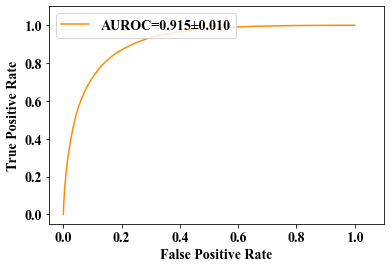

In [7]:
# 画ROC曲线图
plot_roc(label,score)